<a href="https://colab.research.google.com/github/pghatani0811/Linear-Regression-Project/blob/main/SeoulBikeCountProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
data.shape

(8760, 14)

In [9]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
data.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


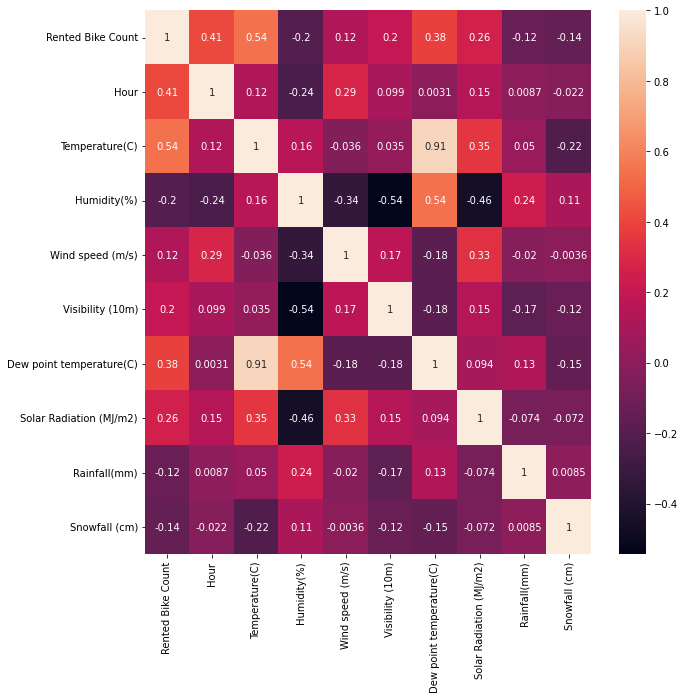

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot =True)
plt.show()

In [6]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [7]:
data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [8]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
data.drop('Date',axis = 1,inplace = True)

In [18]:
df_cat = data.select_dtypes(include = 'object')
df_cat.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [19]:
df1 = data
for i in df_cat:
  dummies = pd.get_dummies(data[i],drop_first=True)
  df1 = pd.concat([df1,dummies],axis= 'columns')

In [20]:
df1.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Spring,Summer,Winter,No Holiday,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,0,1,1,1


In [21]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

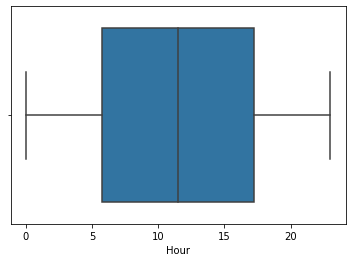

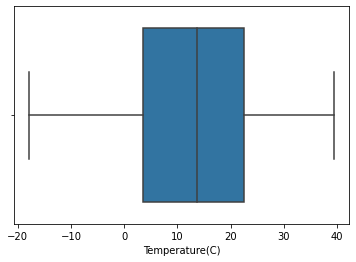

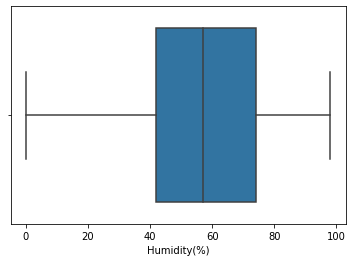

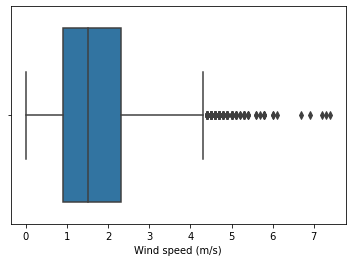

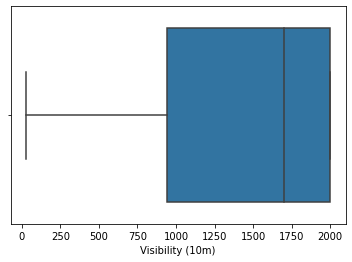

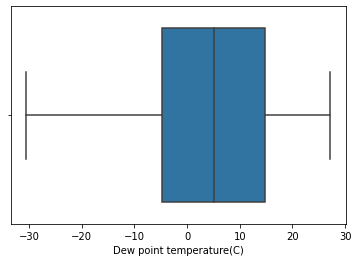

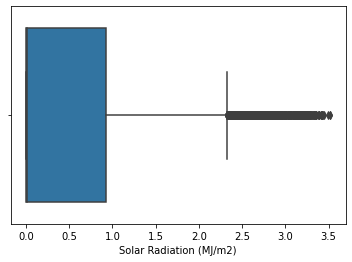

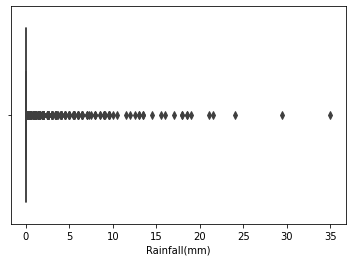

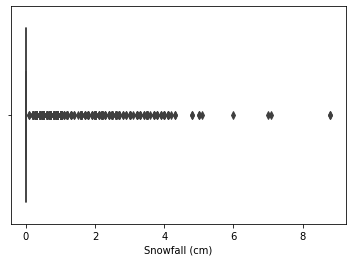

In [22]:
cols = ['Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in cols:
  plt.figure()
  sns.boxplot(data = df1,x=col)

In [23]:
Q1 = np.percentile(df1['Wind speed (m/s)'],25,interpolation='midpoint')
Q2 = np.percentile(df1['Wind speed (m/s)'],50,interpolation='midpoint')
Q3 = np.percentile(df1['Wind speed (m/s)'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower Limit',low_lim)
print('Upper Limit',up_lim)

Lower Limit -1.1999999999999997
Upper Limit 4.3999999999999995


In [24]:
df1 = df1[df1['Wind speed (m/s)'] < up_lim]

In [26]:
df1.shape

(8599, 18)

In [28]:
Q1 = np.percentile(df1['Solar Radiation (MJ/m2)'],25,interpolation='midpoint')
Q2 = np.percentile(df1['Solar Radiation (MJ/m2)'],50,interpolation='midpoint')
Q3 = np.percentile(df1['Solar Radiation (MJ/m2)'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower Limit',low_lim)
print('Upper Limit',up_lim)

Lower Limit -1.35
Upper Limit 2.25


In [29]:
df1 = df1[df1['Solar Radiation (MJ/m2)'] < up_lim]

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7908 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         7908 non-null   int64  
 1   Hour                      7908 non-null   int64  
 2   Temperature(C)            7908 non-null   float64
 3   Humidity(%)               7908 non-null   int64  
 4   Wind speed (m/s)          7908 non-null   float64
 5   Visibility (10m)          7908 non-null   int64  
 6   Dew point temperature(C)  7908 non-null   float64
 7   Solar Radiation (MJ/m2)   7908 non-null   float64
 8   Rainfall(mm)              7908 non-null   float64
 9   Snowfall (cm)             7908 non-null   float64
 10  Seasons                   7908 non-null   object 
 11  Holiday                   7908 non-null   object 
 12  Functioning Day           7908 non-null   object 
 13  Spring                    7908 non-null   uint8  
 14  Summer  

In [34]:
df1.drop(['Seasons','Holiday','Functioning Day'],axis=1,inplace = True)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df1)

StandardScaler()

In [36]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1, test_size=0.25)

In [40]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count'] 


In [41]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (5931, 14)
Dimension of train_y dataframe: (5931,)
Dimension of val_x dataframe: (1977, 14)
Dimension of val_y dataframe: (1977,)


In [42]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 335.09020625834034
Mean Square Error of linear regression: 201637.92490529406
R_Squared Score of linear regression: 0.172260154126458


In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5552129722460182
number of feature used: 14


In [46]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5549425858565159
number of feature used: 14
